Question 4:
'instrumentalness'

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import tensorflow as tf

# Load the dataset
file_path = '/content/drive/MyDrive/data science/spotify52kData.csv'  # Replace with your file path
spotify_data = pd.read_csv(file_path)

print(spotify_data)

       songNumber                                     artists  \
0               0                                 Gen Hoshino   
1               1                                Ben Woodward   
2               2                      Ingrid Michaelson;ZAYN   
3               3                                Kina Grannis   
4               4                            Chord Overstreet   
...           ...                                         ...   
51995       51995                        Don Omar;Trebol Clan   
51996       51996                                    Don Omar   
51997       51997                                    Don Omar   
51998       51998  Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee   
51999       51999                         Don Omar;Juan Magán   

                                              album_name  \
0                                                 Comedy   
1                                       Ghost (Acoustic)   
2                                      

In [3]:
# Assuming df is your DataFrame and 'genre' is the column where you want to make the change
# Replace 'alt' with 'alternative rock' in the 'genre' column
spotify_data['track_genre'] = spotify_data['track_genre'].replace('alternative', 'alt-rock')



# Check for duplicate rows
spotify_data.drop('songNumber', axis=1, inplace=True)
duplicates = spotify_data.duplicated().sum()
nulls=spotify_data.duplicated().isna().sum()


print(f"Number of duplicate rows in the dataset: {duplicates}")
print(f"Number of nulls in the dataset: {nulls}")

spotify_data_dropped=spotify_data.drop_duplicates()
print(spotify_data_dropped.shape)


Number of duplicate rows in the dataset: 863
Number of nulls in the dataset: 0
(51137, 19)


In [4]:
# Re-defining the features as per the user's instruction
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']

In [14]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Function to create a model for each feature and evaluate it
def evaluate_feature(feature):
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(spotify_data_dropped[[feature]], spotify_data_dropped['popularity'], test_size=0.2, random_state=16394389) #Jainam Jain - Net ID

    # Creating and fitting the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicting and evaluating
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

# Evaluating each feature
evaluation_results = {}
for feature in features:
    evaluation_results[feature] = evaluate_feature(feature)

evaluation_results_sorted = sorted(evaluation_results.items(), key=lambda x: x[1][2], reverse=True) # Sorting based on R-squared
evaluation_results_sorted


[('instrumentalness',
  (453.2021565410379, 17.859898759905672, 0.018797362084708835)),
 ('energy', (459.81110357600375, 18.12033114673515, 0.004488700550430158)),
 ('speechiness',
  (460.11447522931087, 18.10314483991736, 0.003831887553851332)),
 ('duration', (460.5170227554665, 18.19272831172598, 0.002960354422665956)),
 ('loudness', (460.52805305660166, 18.15005960708711, 0.0029364733346909366)),
 ('liveness', (460.73776518089574, 18.15141314078172, 0.002482437345253774)),
 ('danceability',
  (461.29810210873546, 18.17048477332313, 0.0012692832069021165)),
 ('acousticness',
  (461.46452156740133, 18.196647428924443, 0.0009089777461124271)),
 ('valence', (461.74438803346, 18.212730732633233, 0.00030305451561263297)),
 ('tempo', (461.9902987978692, 18.21794691999167, -0.00022935312465910407))]

Question 5:


In [15]:
from sklearn.linear_model import Ridge

# Re-defining the features, excluding 'tempo' as per user instruction
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']

# Splitting the data for the new set of features
X_train, X_test, y_train, y_test = train_test_split(spotify_data_dropped[features], spotify_data_dropped['popularity'], test_size=0.2, random_state=16394389)


# Creating and fitting the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting and evaluating the Linear Regression model
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Creating and fitting the Ridge Regression model for regularization
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predicting and evaluating the Ridge Regression model
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

(mse_lr, r2_lr), (mse_ridge, r2_ridge)

((438.87151017217076, 0.049823842910579286),
 (438.87302812795144, 0.049820556469429844))

Question 6:


1.   We chose 6 ideal princiapl components that accounted for 85% of the variance
2.   Using this princiapl componenet we identified 2 optimal number of clusters.
And, according to us this clusters does not correspond to genre labels as there are 51 genres and we got 2 clusters out of it



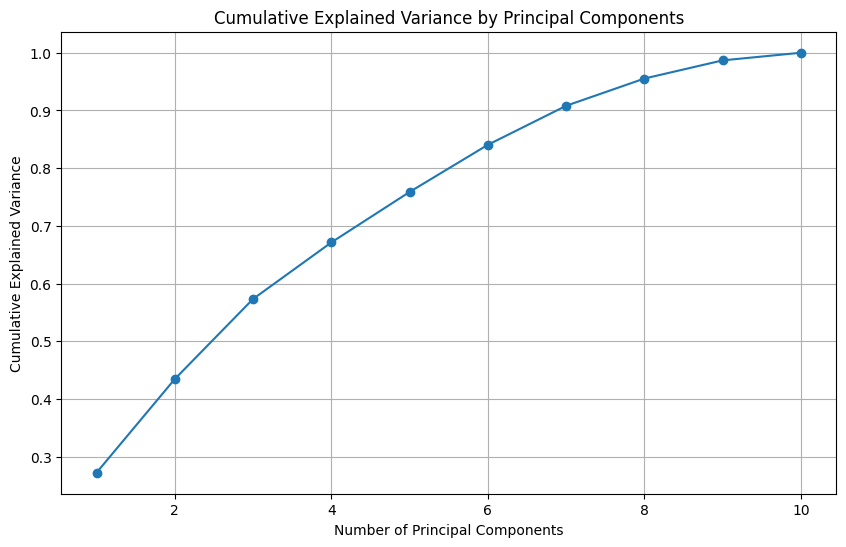

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Define features
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Extract features and genre labels
X = spotify_data_dropped[features]
genre_labels = spotify_data_dropped['track_genre']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determining the number of meaningful principal components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plotting the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

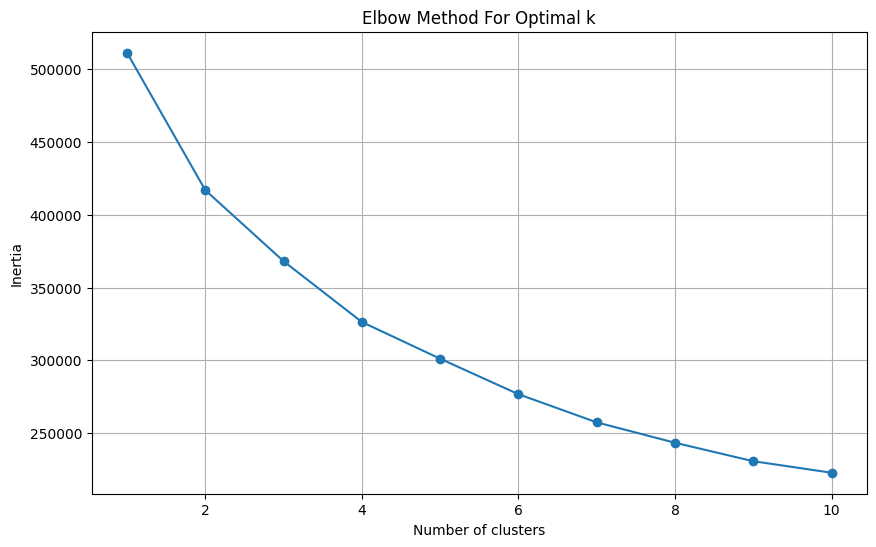

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming X is your standardized feature set

# Choosing the number of components based on the PCA analysis
n_components = 6
pca_optimal = PCA(n_components=n_components)
X_pca_optimal = pca_optimal.fit_transform(X)


# Finding the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=16394389)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


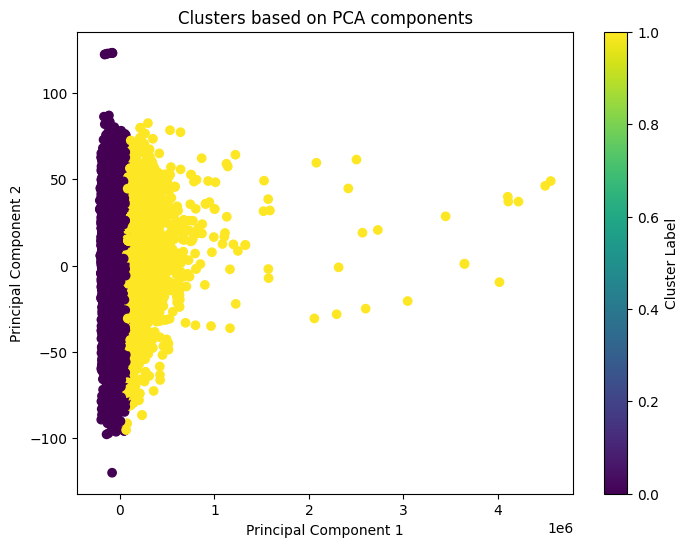

In [18]:
import matplotlib.pyplot as plt

# Choose the number of clusters here based on previous results, e.g., 3 or 6
optimal_clusters = 2 # assuming 3 was chosen as an optimal number

# Fitting KMeans with the chosen number of clusters on the data transformed by the first 6 PCA components
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_pca_optimal)

# Getting the cluster labels
labels_optimal = kmeans_optimal.labels_

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], c=labels_optimal, cmap='viridis', marker='o')
plt.title('Clusters based on PCA components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [19]:
spotify_data_dropped['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'ambient', 'anime',
       'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat',
       'british', 'cantopop', 'chicago-house', 'children', 'chill',
       'classical', 'club', 'comedy', 'country', 'dance', 'dancehall',
       'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney',
       'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic',
       'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german',
       'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar',
       'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal',
       'hip-hop'], dtype=object)

Question 8:
An accuracy of approximately 29.73% in a multi-class classification task like genre prediction indicates that the neural network model performs only slightly better than random guessing for a large number of classes. For reference, if there were 10 genres (classes) and the model was guessing randomly, you'd expect it to be correct about 10% of the time.

Here are some considerations regarding the performance:

1. **Complexity of Genre Classification**: Genre classification is inherently a complex task due to the subjective nature of music genres and the overlap between different genres.

2. **Baseline Comparison**: To better understand the performance, it would be useful to compare it against a naive baseline, such as the accuracy of always predicting the most frequent class.

3. **Number of Classes**: If there are many genres (classes), then 26.75% might not be as low as it seems. However, if there are only a few classes, this indicates poor performance.

4. **Data Balance**: If the dataset is imbalanced (some genres have many more songs than others), the model might be biased towards predicting more common genres.

5. **Model Complexity**: The neural network architecture might be too simple or too complex for the task at hand. Adjusting the number of layers, units, or the learning rate could potentially improve the performance.

6. **Feature Engineering**: The features used might not be capturing the nuances required to distinguish between genres effectively. More sophisticated feature engineering or the use of deep learning techniques to automatically extract features could be beneficial.

7. **Training Process**: Overfitting or underfitting during the training process can affect performance. Techniques like dropout, regularization, or adjustments to the training epochs and batch size could be explored.

Given the accuracy, there is certainly room for improvement in the model. You should consider the points above and explore ways to improve the model's ability to generalize and predict more accurately.

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load your dataset
# spotify_data = pd.read_csv('path_to_your_data.csv')

# Define features and labels
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']
X = spotify_data_dropped[features].values
y = spotify_data_dropped['track_genre'].values

# Encode the labels to integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
# Convert integers to dummy variables (i.e. one hot encoded)
y_dummy = to_categorical(y_encoded)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy, test_size=0.2, random_state=16394389)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_dummy.shape[1], activation='softmax')) # Output layer with one neuron per class

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
scores = model.evaluate(X_test_scaled, y_test)
print(f"Accuracy: {scores[1]*100}")


Epoch 1/100
1023/1023 [==============================] - 4s 3ms/step - loss: 3.1175 - accuracy: 0.1751 - val_loss: 2.8475 - val_accuracy: 0.2166
Epoch 2/100
1023/1023 [==============================] - 3s 3ms/step - loss: 2.7865 - accuracy: 0.2340 - val_loss: 2.7767 - val_accuracy: 0.2332
Epoch 3/100
1023/1023 [==============================] - 3s 3ms/step - loss: 2.7323 - accuracy: 0.2463 - val_loss: 2.7389 - val_accuracy: 0.2408
Epoch 4/100
1023/1023 [==============================] - 3s 3ms/step - loss: 2.6977 - accuracy: 0.2516 - val_loss: 2.7167 - val_accuracy: 0.2491
Epoch 5/100
1023/1023 [==============================] - 4s 4ms/step - loss: 2.6723 - accuracy: 0.2616 - val_loss: 2.6927 - val_accuracy: 0.2531
Epoch 6/100
1023/1023 [==============================] - 3s 3ms/step - loss: 2.6515 - accuracy: 0.2627 - val_loss: 2.6736 - val_accuracy: 0.2584
Epoch 7/100
1023/1023 [==============================] - 2s 2ms/step - loss: 2.6324 - accuracy: 0.2715 - val_loss: 2.6594 - val_ac